In [36]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
from scipy import stats

In [25]:
df = pd.read_csv("raw_data/r_volcano.csv")

In [26]:
vht = df.values
x_len,y_len =vht.shape
x_grid = np.array(range(x_len))
y_grid = np.array(range(y_len))

<IPython.core.display.Javascript object>


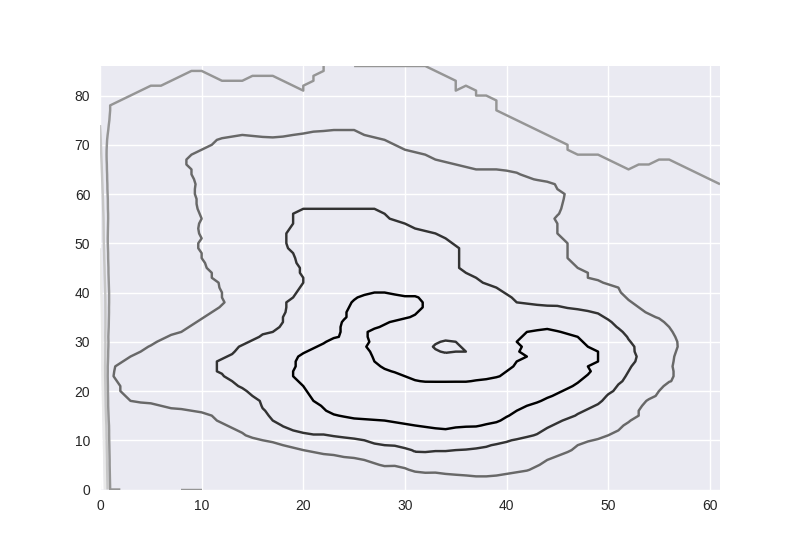

In [27]:
plt.contour(vht)

In [5]:
## Variogram

In [6]:
import random

svg = []
for i in range(100):
    x = random.randint(1,x_len)-1
    y = random.randint(1,y_len)-1
    v = np.array([x,y])
    a = vht[x,y]
    for j in range(100):
        x2 = random.randint(1,x_len)-1
        y2 = random.randint(1,y_len)-1
        v2 = np.array([x2,y2])
        a2 = vht[x2,y2]
        vd = v2 - v
        h = np.dot(vd,vd)
        ad = a2 - a
        svg.append([x,y,x2,y2,a,a2,h,np.sqrt(h),ad,ad*ad])
                

In [7]:
len(svg)

10000

In [8]:
dfSamples = pd.DataFrame(svg,columns=['x1','y1','x2','y2','a1','a2','distsq','dist','deviate','dsq'])

In [9]:
dfSamples[:6]

,x1,y1,x2,y2,a1,a2,distsq,dist,deviate,dsq
0,26,0,41,35,27,160,1450,38.078866,133,17689
1,26,0,1,51,27,108,3226,56.797887,81,6561
2,26,0,16,11,27,127,221,14.866069,100,10000
3,26,0,80,20,27,101,3316,57.584720,74,5476
4,26,0,4,30,27,123,1384,37.202150,96,9216
5,26,0,16,46,27,157,2216,47.074409,130,16900


In [82]:
xBins = pd.cut(dfSamples['dist'],bins=40)

In [38]:
binnedVar = dfSamples.groupby(xBins).mean()
del binnedVar['dist']
bVar = binnedVar.reset_index()
bVar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
dist       40 non-null category
x1         40 non-null float64
y1         40 non-null float64
x2         40 non-null float64
y2         40 non-null float64
a1         40 non-null float64
a2         40 non-null float64
distsq     40 non-null float64
deviate    40 non-null float64
dsq        40 non-null float64
dtypes: category(1), float64(9)
memory usage: 3.2 KB


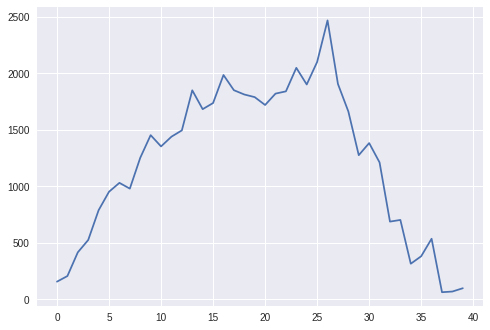

In [40]:
plt.plot(bVar['dsq'])

In [13]:
# Long distance variation is limited statistics due to the cut-off of the grid

In [14]:
vals = []
for i in range(100):
    x = random.randint(1,x_len)-1
    y = random.randint(1,y_len)-1
    v = np.array([x,y])
    for j in range(1000):
        x2 = random.randint(1,x_len)-1
        y2 = random.randint(1,y_len)-1
        v2 = np.array([x2,y2])
        vd = v2 - v
        h2 = np.dot(vd,vd)
        h = np.sqrt(h2)
        vals.append(h)


(array([  5510.,  13417.,  18323.,  19134.,  17261.,  12763.,   7770.,
          4276.,   1355.,    191.]),
 array([   0.        ,   10.24158191,   20.48316382,   30.72474573,
          40.96632764,   51.20790955,   61.44949145,   71.69107336,
          81.93265527,   92.17423718,  102.41581909]),
 <a list of 10 Patch objects>)

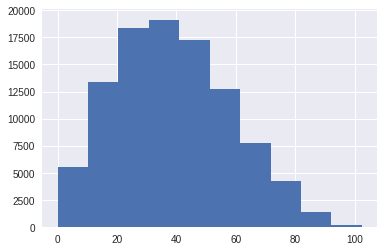

In [15]:
plt.hist(vals)

In [16]:
def vg_func(a,b):
    def variogram(d):
        return a * (np.tanh(d/b))
    return variogram

In [17]:
tFunc = vg_func(2000,10)
np.arange(0,30,0.1)
def gen_plot(f):
    vdf = pd.DataFrame({'XVals':np.arange(0,30,0.1)})
    vdf['YVals'] = vdf['XVals'].apply(f)
    return vdf

Text(0.5,0.98,'Comparison of shapes - x axis not the same')

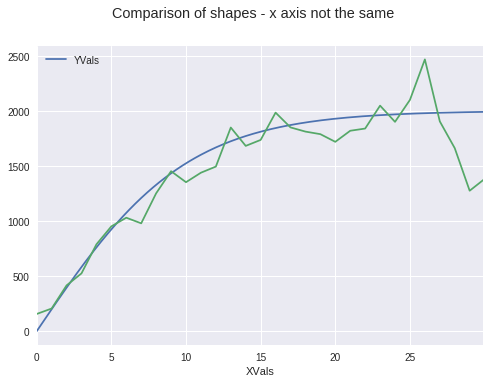

In [52]:
p = gen_plot(tFunc)
p.plot(x='XVals',y='YVals')
plt.plot(bVar['dsq'])
plt.suptitle("Comparison of shapes - x axis not the same")

In [19]:
flattened = []
for i in x_grid:
    for j in y_grid:
        flattened.append([i,j,vht[i,j]])
dfFlat = pd.DataFrame(flattened,columns=['X','Y','Height'])


In [20]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [21]:
y_grid

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

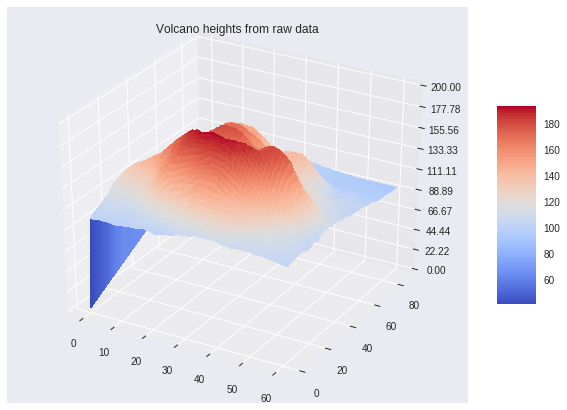

In [92]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

## Matplotlib Sample Code using 2D arrays via meshgrid
X, Y = np.meshgrid(x_grid,y_grid)

Z = np.sqrt(vht * vht).T

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(Y, X, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 200.0)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Volcano heights from raw data')
plt.show()

In [30]:
from scipy.optimize import curve_fit

In [81]:
def get_bin_mid(binStr):
    bs = binStr[1:-1]
    bss = bs.split(',')
    left = float(bss[0])
    right = float(bss[1])
    return 0.5 *(left+right)
bVar['binMid'] = bVar['dist'].apply(get_bin_mid)
tFunc = vg_func(2000,10)
bVar['func'] = bVar['binMid'].apply(tFunc)

#plt.plot(bVar['binMid'],bVar['func'])
#plt.plot(bVar['dsq'])
bVar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
dist       40 non-null category
x1         40 non-null float64
y1         40 non-null float64
x2         40 non-null float64
y2         40 non-null float64
a1         40 non-null float64
a2         40 non-null float64
distsq     40 non-null float64
deviate    40 non-null float64
dsq        40 non-null float64
fred       40 non-null object
binMid     40 non-null category
func       40 non-null category
dtypes: category(3), float64(9), object(1)
memory usage: 4.3+ KB


In [32]:
def variogram(d,a,b):
    return a * (np.tanh(d/b))
q = curve_fit(variogram,points,values,init_guesses)

NameError: name 'points' is not defined

In [51]:
#binnedVar['fred'] = binnedVar['dist'].apply( lambda x: x.__class__)
binnedVar.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 40 entries, (0.903, 3.419] to (95.336, 97.755]
Data columns (total 10 columns):
x1         40 non-null float64
y1         40 non-null float64
x2         40 non-null float64
y2         40 non-null float64
a1         40 non-null float64
a2         40 non-null float64
distsq     40 non-null float64
deviate    40 non-null float64
dsq        40 non-null float64
fred       0 non-null object
dtypes: float64(9), object(1)
memory usage: 3.5+ KB


In [55]:
binnedVar.index

CategoricalIndex(['(0.903, 3.419]', '(3.419, 5.838]', '(5.838, 8.257]',
                  '(8.257, 10.675]', '(10.675, 13.0943]', '(13.0943, 15.513]',
                  '(15.513, 17.932]', '(17.932, 20.351]', '(20.351, 22.77]',
                  '(22.77, 25.189]', '(25.189, 27.608]', '(27.608, 30.0264]',
                  '(30.0264, 32.445]', '(32.445, 34.864]', '(34.864, 37.283]',
                  '(37.283, 39.702]', '(39.702, 42.121]', '(42.121, 44.54]',
                  '(44.54, 46.959]', '(46.959, 49.377]', '(49.377, 51.796]',
                  '(51.796, 54.215]', '(54.215, 56.634]', '(56.634, 59.0529]',
                  '(59.0529, 61.472]', '(61.472, 63.891]', '(63.891, 66.309]',
                  '(66.309, 68.728]', '(68.728, 71.147]', '(71.147, 73.566]',
                  '(73.566, 75.985]', '(75.985, 78.404]', '(78.404, 80.823]',
                  '(80.823, 83.242]', '(83.242, 85.66]', '(85.66, 88.0793]',
                  '(88.0793, 90.498]', '(90.498, 92.917]', '(92.917, 9

In [70]:
dfBins = pd.DataFrame(xBins)
def peel(x):
    print(x)
    print(x.__class)
    a,b = x
    return a
#dfBins['First'] = dfBins['dist'].apply(peel)
dfBins.info()
xBins[3]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
dist    10000 non-null category
dtypes: category(1)
memory usage: 10.2 KB


'(56.634, 59.0529]'

In [91]:
bVar['dist'].values[1]

'(3.419, 5.838]'

In [89]:
xBins.values[0]

'(37.283, 39.702]'